## Disease Prediction

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from wordcloud import WordCloud
wc = WordCloud(width=400, height=400, max_words=300)

In [3]:
import warnings
warnings.filterwarnings('ignore')

#### Import Dataset

In [4]:
food_disease_df = pd.read_csv('Food_Nutrition_Disease.csv')
food_disease_df.head(3)

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion,Disease
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,2020,250,30.0,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit,Weight Gain
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,1480,200,24.0,40,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter,"Weight Gain, Hypertension, Heart Disease"
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,2185,300,36.0,65,Tofu and veggie breakfast burrito,Black bean burger on a whole wheat bun,Lentil and vegetable curry,Trail mix,Weight Gain


## Dataset Properties

#### Shape

In [5]:
food_disease_df.shape

(1698, 19)

#### Columns

In [6]:
food_disease_df.columns

Index(['Ages', 'Gender', 'Height', 'Weight', 'Activity Level',
       'Dietary Preference', 'Daily Calorie Target', 'Protein', 'Sugar',
       'Sodium', 'Calories', 'Carbohydrates', 'Fiber', 'Fat',
       'Breakfast Suggestion', 'Lunch Suggestion', 'Dinner Suggestion',
       'Snack Suggestion', 'Disease'],
      dtype='object')

#### Numerical Columns

In [7]:
food_disease_df.select_dtypes(include='number').columns

Index(['Ages', 'Height', 'Weight', 'Daily Calorie Target', 'Protein', 'Sugar',
       'Sodium', 'Calories', 'Carbohydrates', 'Fiber', 'Fat'],
      dtype='object')

#### Categorical Columns

In [8]:
food_disease_df.select_dtypes(include='object').columns

Index(['Gender', 'Activity Level', 'Dietary Preference',
       'Breakfast Suggestion', 'Lunch Suggestion', 'Dinner Suggestion',
       'Snack Suggestion', 'Disease'],
      dtype='object')

#### Dataframe Information

In [9]:
food_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ages                  1698 non-null   int64  
 1   Gender                1698 non-null   object 
 2   Height                1698 non-null   int64  
 3   Weight                1698 non-null   int64  
 4   Activity Level        1698 non-null   object 
 5   Dietary Preference    1698 non-null   object 
 6   Daily Calorie Target  1698 non-null   int64  
 7   Protein               1698 non-null   int64  
 8   Sugar                 1698 non-null   float64
 9   Sodium                1698 non-null   float64
 10  Calories              1698 non-null   int64  
 11  Carbohydrates         1698 non-null   int64  
 12  Fiber                 1698 non-null   float64
 13  Fat                   1698 non-null   int64  
 14  Breakfast Suggestion  1698 non-null   object 
 15  Lunch Suggestion     

## Statistics

#### Quantiles

In [10]:
food_disease_df.describe()

,Ages,Height,Weight,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat
count,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000
mean,43.961720,174.130153,78.064193,2275.171967,139.898115,126.192580,27.979623,2196.440518,252.385159,30.286219,69.700824
std,15.915002,13.420936,16.949264,558.812405,53.326588,34.938902,10.665318,571.089569,69.877804,8.385337,21.430707
min,18.000000,150.000000,48.000000,1200.000000,50.000000,60.000000,10.000000,990.000000,120.000000,14.400000,30.000000
25%,30.000000,163.250000,64.000000,1800.000000,100.000000,100.000000,20.000000,1770.250000,200.000000,24.000000,52.000000
50%,42.000000,174.000000,78.000000,2200.000000,136.000000,124.000000,27.200000,2146.000000,248.000000,29.760000,69.000000
75%,57.000000,185.000000,91.000000,2689.000000,174.000000,150.000000,34.800000,2549.750000,300.000000,36.000000,85.000000
max,79.000000,200.000000,119.000000,4364.000000,327.000000,218.000000,65.400000,4357.000000,436.000000,52.320000,145.000000


#### Correlations

In [11]:
food_disease_df.corr(numeric_only=True)

,Ages,Height,Weight,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat
Ages,1.000000,-0.064644,0.065390,-0.159009,-0.129996,-0.111314,-0.129996,-0.149304,-0.111314,-0.111314,-0.136997
Height,-0.064644,1.000000,0.182363,0.258351,0.208535,0.224251,0.208535,0.264177,0.224251,0.224251,0.226601
Weight,0.065390,0.182363,1.000000,0.287901,0.147734,0.295291,0.147734,0.274612,0.295291,0.295291,0.221792
Daily Calorie Target,-0.159009,0.258351,0.287901,1.000000,0.688599,0.656500,0.688599,0.825169,0.656500,0.656500,0.730332
Protein,-0.129996,0.208535,0.147734,0.688599,1.000000,0.408783,1.000000,0.824346,0.408783,0.408783,0.742495
Sugar,-0.111314,0.224251,0.295291,0.656500,0.408783,1.000000,0.408783,0.815888,1.000000,1.000000,0.514516
Sodium,-0.129996,0.208535,0.147734,0.688599,1.000000,0.408783,1.000000,0.824346,0.408783,0.408783,0.742495
Calories,-0.149304,0.264177,0.274612,0.825169,0.824346,0.815888,0.824346,1.000000,0.815888,0.815888,0.866884
Carbohydrates,-0.111314,0.224251,0.295291,0.656500,0.408783,1.000000,0.408783,0.815888,1.000000,1.000000,0.514516
Fiber,-0.111314,0.224251,0.295291,0.656500,0.408783,1.000000,0.408783,0.815888,1.000000,1.000000,0.514516


## Dataset Cleaning

#### Remove Duplicates

In [12]:
food_disease_df.duplicated().sum()

0

#### Nulls

In [13]:
food_disease_df.isnull().sum()

Ages                    0
Gender                  0
Height                  0
Weight                  0
Activity Level          0
Dietary Preference      0
Daily Calorie Target    0
Protein                 0
Sugar                   0
Sodium                  0
Calories                0
Carbohydrates           0
Fiber                   0
Fat                     0
Breakfast Suggestion    0
Lunch Suggestion        0
Dinner Suggestion       0
Snack Suggestion        0
Disease                 0
dtype: int64

## EDA

#### Numerical Columns

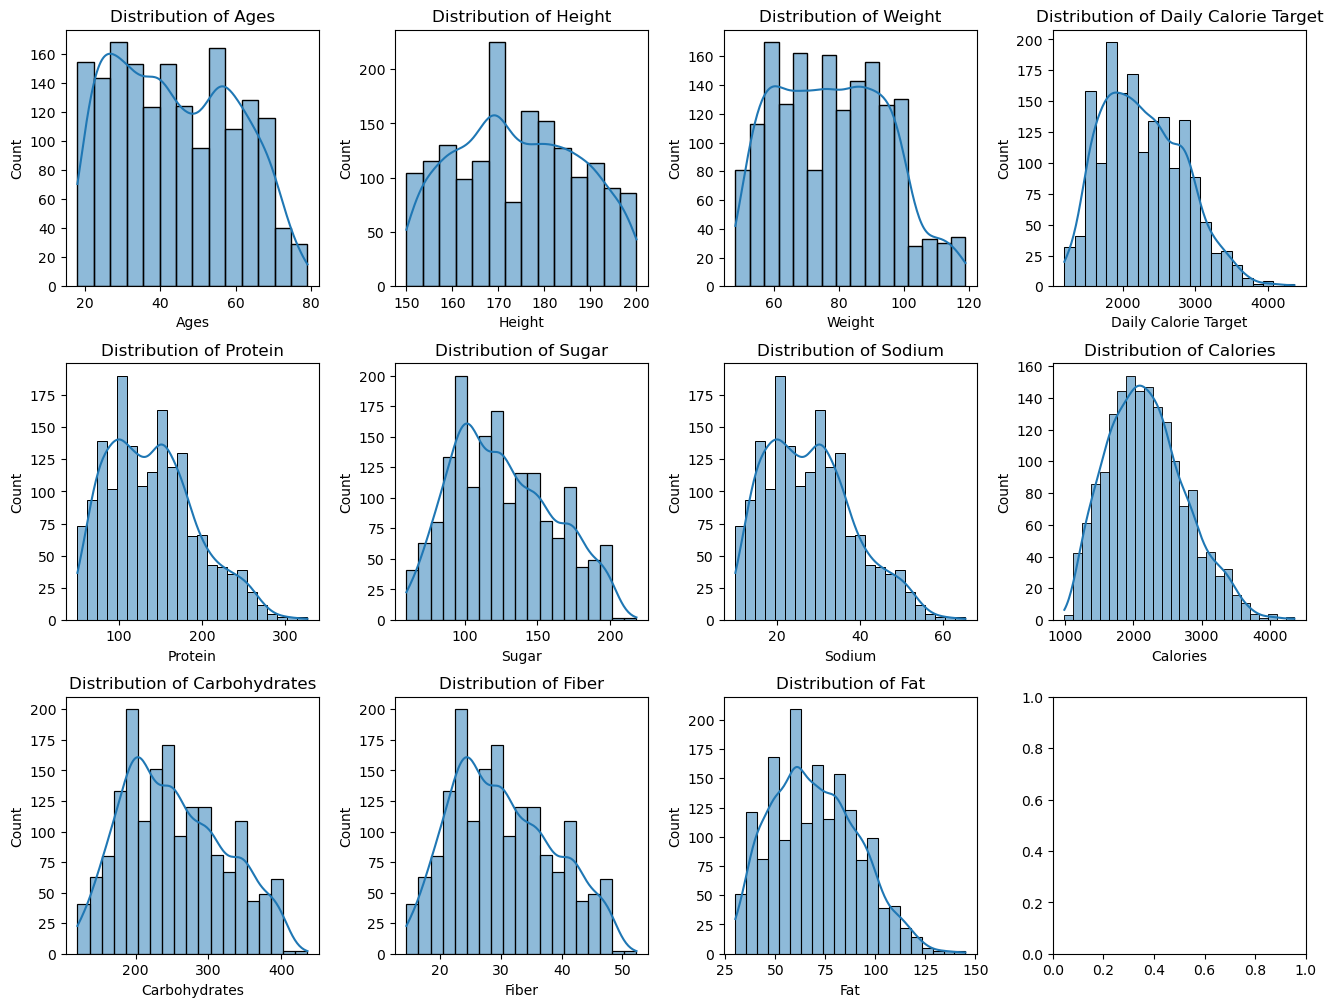

In [14]:
plt.subplots(3,4,figsize = (4*4,3*4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

columns = food_disease_df.select_dtypes(include='number').columns

k = 1
for i in columns:
    plt.subplot(3,4,k)
    sns.histplot(x = i, data = food_disease_df, kde=True)
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

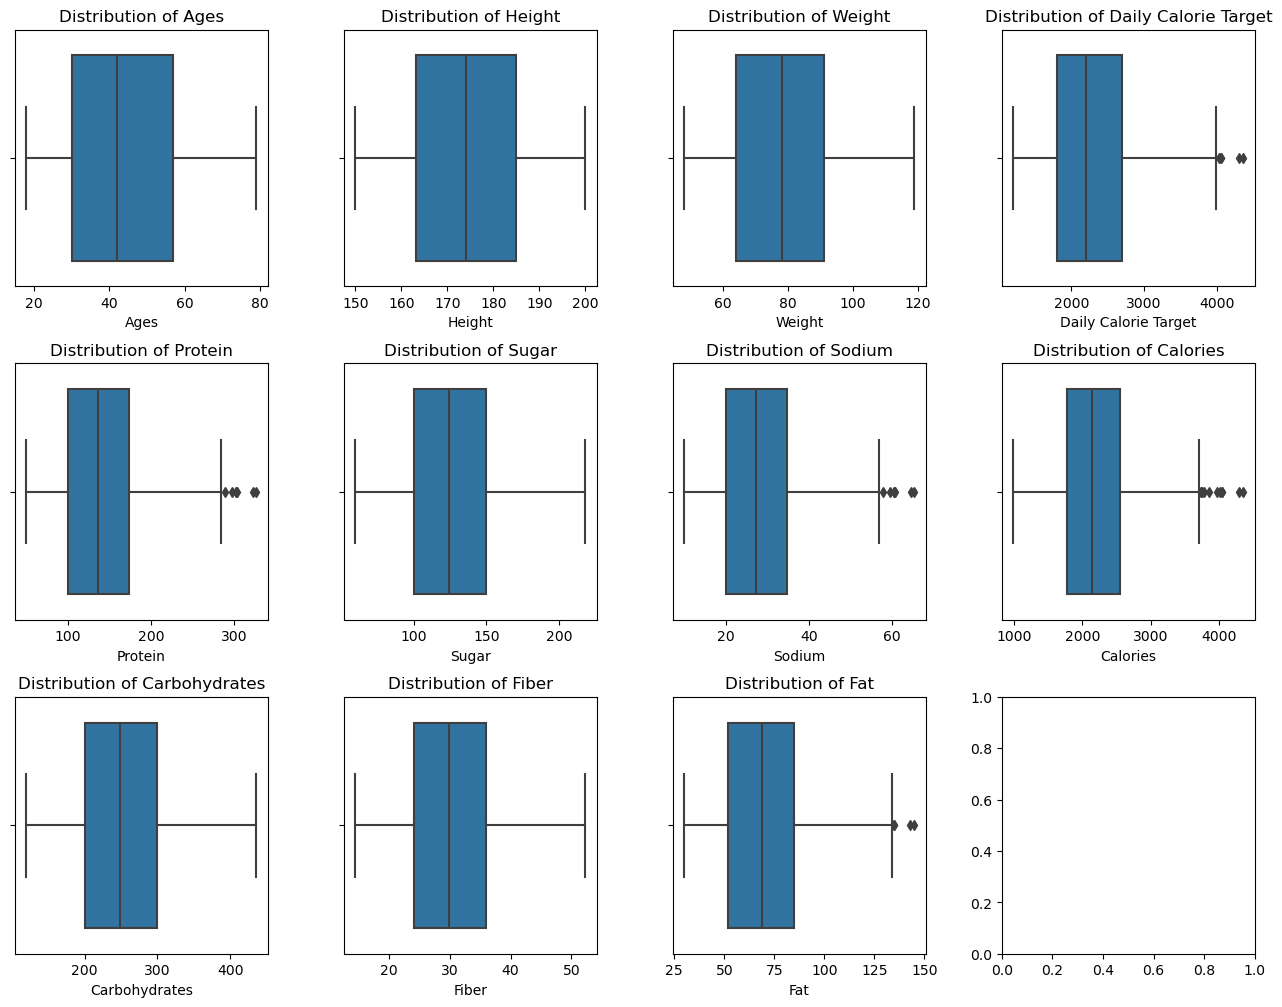

In [15]:
plt.subplots(3,4,figsize = (4*4,3*4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

columns = food_disease_df.select_dtypes(include='number').columns

k = 1
for i in columns:
    plt.subplot(3,4,k)
    sns.boxplot(x = i, data = food_disease_df)
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

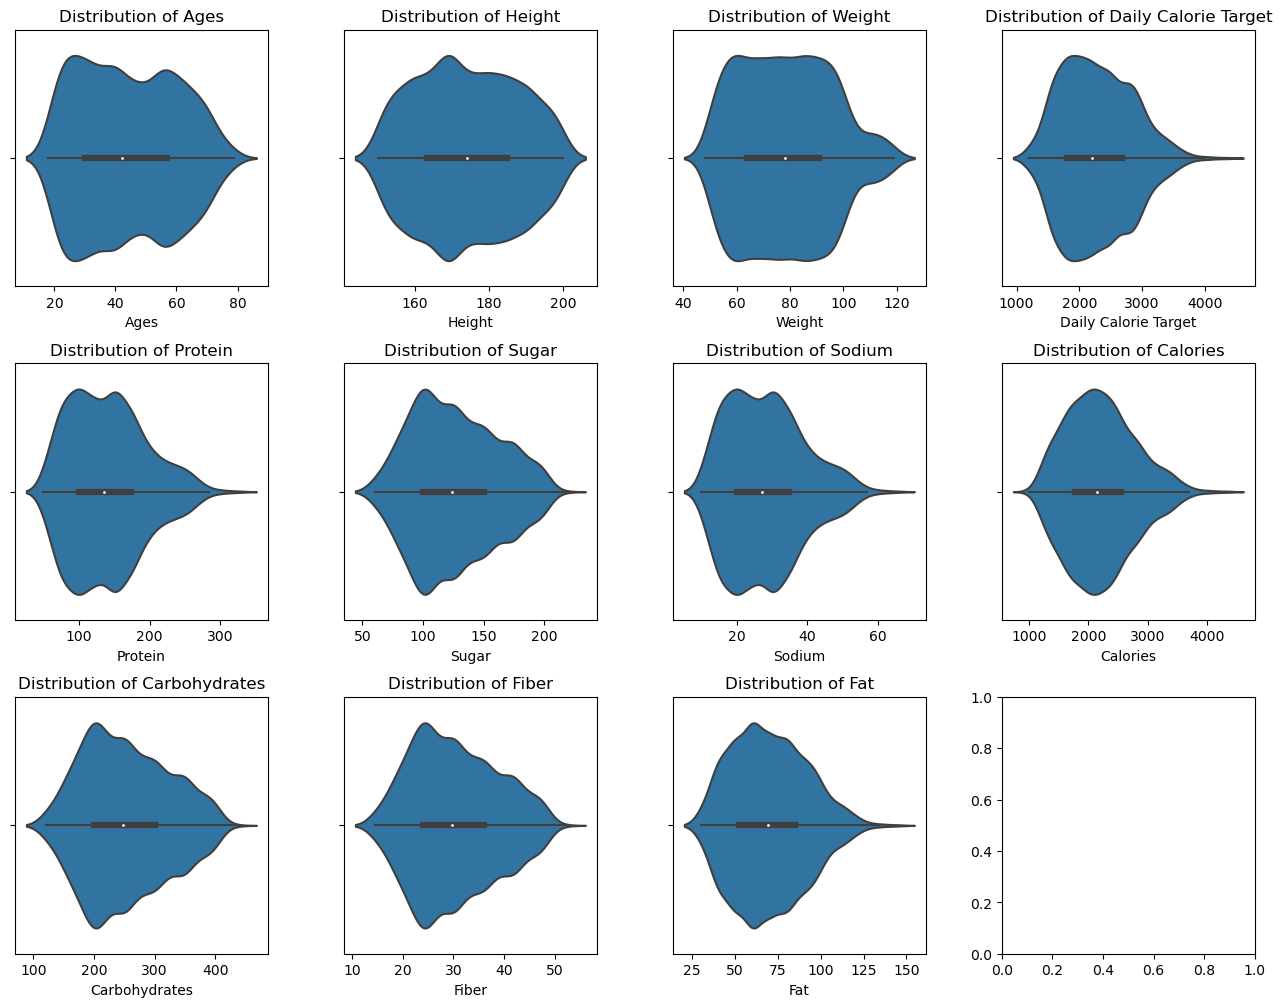

In [16]:
plt.subplots(3,4,figsize = (4*4,3*4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

columns = food_disease_df.select_dtypes(include='number').columns

k = 1
for i in columns:
    plt.subplot(3,4,k)
    sns.violinplot(x = i, data = food_disease_df)
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

#### Categorical Columns

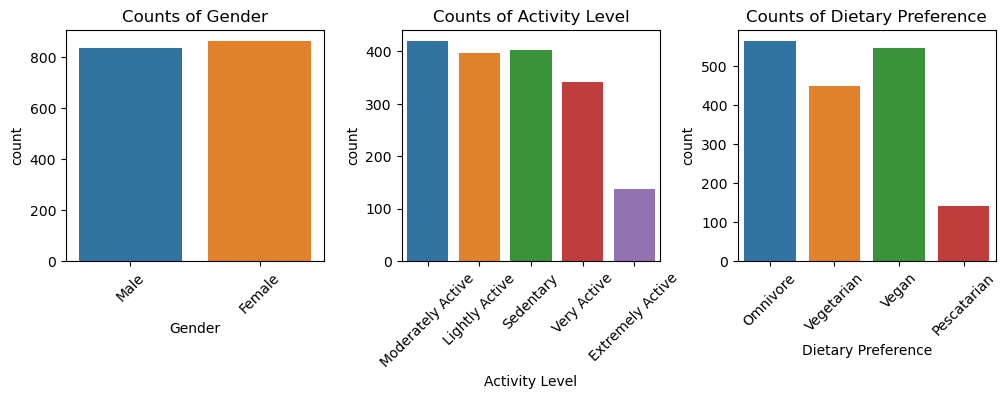

In [17]:
plt.subplots(1,3, figsize = (3*4, 1*3))
plt.subplots_adjust(wspace=0.3)

columns = food_disease_df.select_dtypes(include='object').columns

k = 1
for i in columns[:3]:
    plt.subplot(1,3,k)
    sns.countplot(x = i, data = food_disease_df)
    plt.title(f'Counts of {i}')
    plt.xticks(rotation = 45)
    k += 1

plt.show()

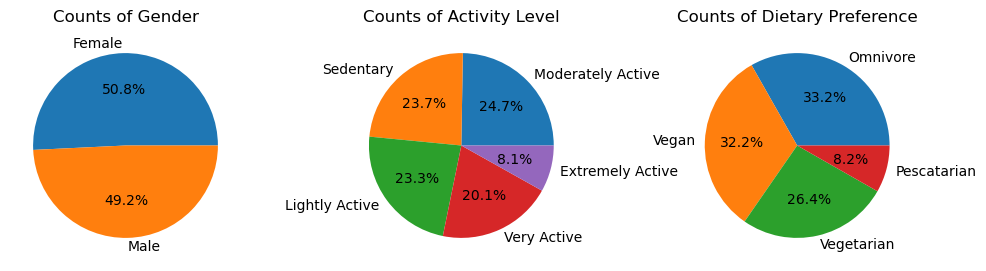

In [18]:
plt.subplots(1,3, figsize = (3*4, 1*3))
plt.subplots_adjust(wspace=0.3)

columns = food_disease_df.select_dtypes(include='object').columns

k = 1
for i in columns[:3]:
    plt.subplot(1,3,k)
    col_dict = dict(food_disease_df[i].value_counts())
    plt.pie(x = col_dict.values(), labels= col_dict.keys(), autopct='%1.1f%%')
    plt.title(f'Counts of {i}')
    k += 1

plt.show()

In [19]:
columns = ['Breakfast Suggestion', 'Lunch Suggestion', 'Dinner Suggestion', 'Snack Suggestion', 'Disease']
food_disease_df[columns] = food_disease_df[columns].apply(lambda x: x + ' ')

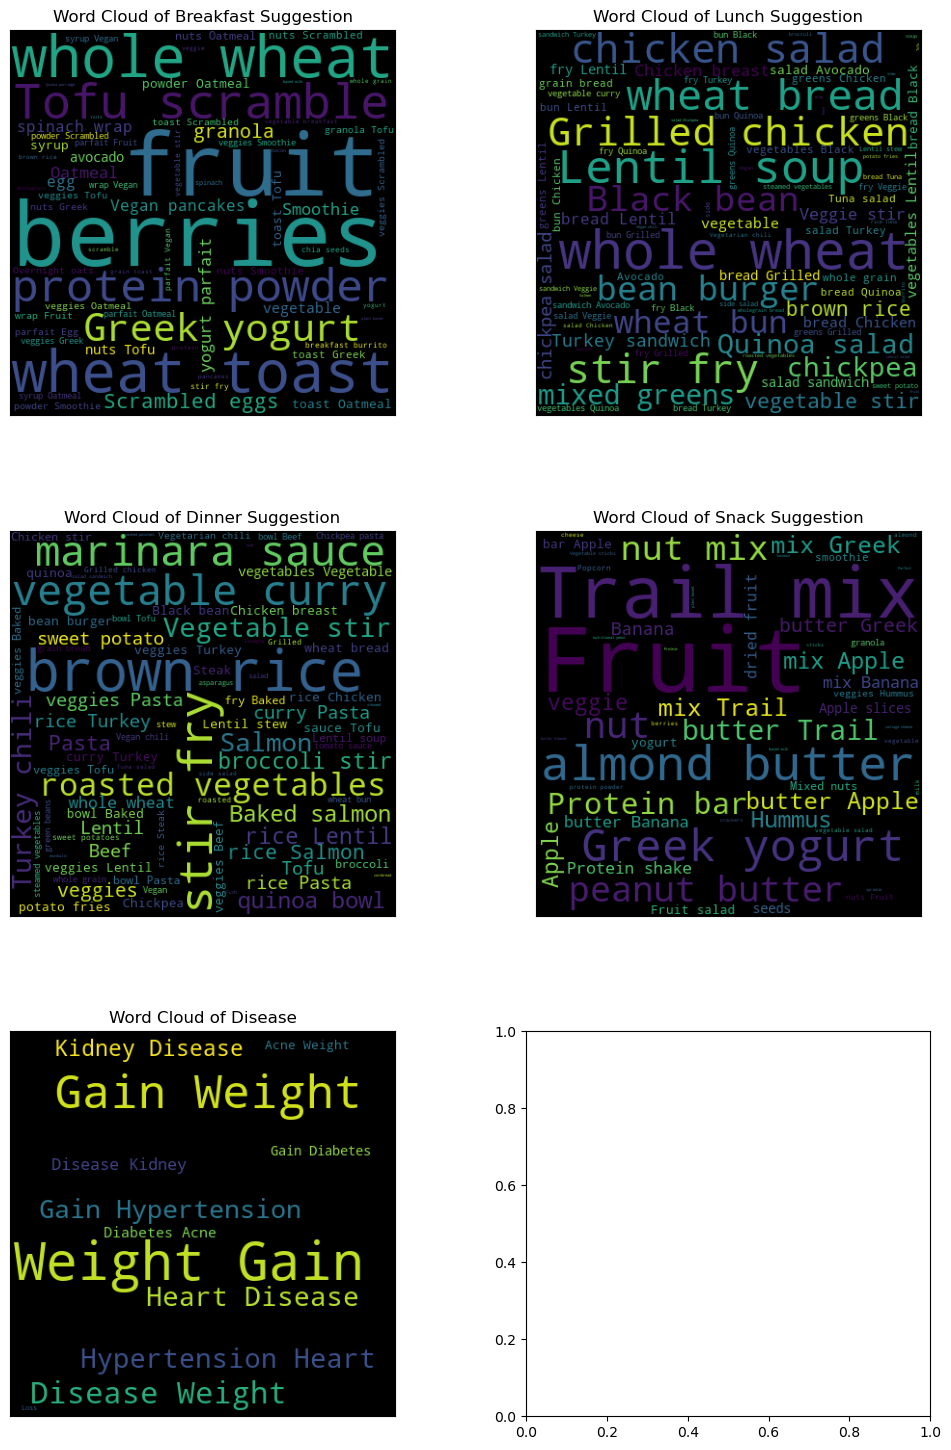

In [20]:
plt.subplots(3,2,figsize = (2*6, 3*6))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

k = 1
for i in columns:
    plt.subplot(3,2,k)
    cloud = wc.generate(food_disease_df[i].sum())
    plt.imshow(cloud)
    plt.title(f'Word Cloud of {i}')
    plt.xticks(ticks = [])
    plt.yticks(ticks = [])
    k += 1

plt.show()

#### Correlation Heatmap

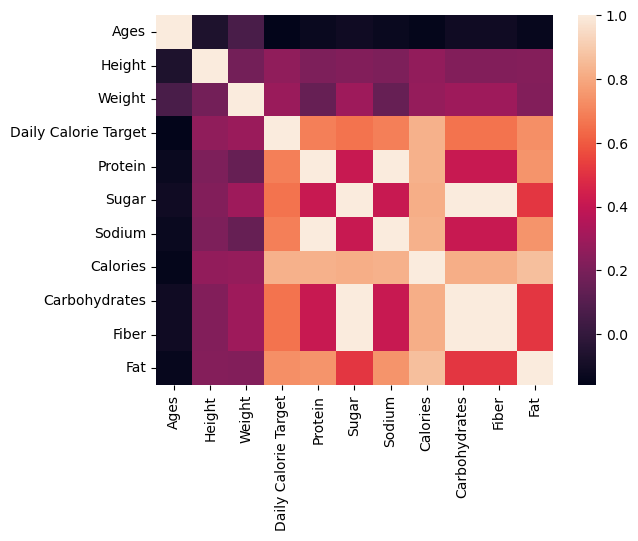

In [21]:
sns.heatmap(data = food_disease_df.corr(numeric_only=True))
plt.show()

## Data Splitting

In [22]:
X = food_disease_df.drop(columns = 'Disease')
Y = food_disease_df['Disease']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape

((1358, 18), (1358,))

## Data Preprocessing

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

Y_pr = le.fit_transform(Y)

#### Column Transformer

In [25]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = Pipeline(steps=[('vectorizer', CountVectorizer(stop_words='english'))])
outliers_remover = Pipeline(steps=[('rob_scaler', RobustScaler()), ('min_max', MinMaxScaler())])

ct = make_column_transformer((vectorizer, 'Breakfast Suggestion'), (vectorizer, 'Lunch Suggestion'), (vectorizer, 'Dinner Suggestion'), 
                             (vectorizer, 'Snack Suggestion'), (outliers_remover, ['Daily Calorie Target', 'Protein', 'Sodium', 'Calories', 'Fat']), 
                             (MinMaxScaler(), ['Ages', 'Height', 'Weight', 'Sugar', 'Carbohydrates', 'Fiber']), 
                             (OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False),['Gender','Dietary Preference']), 
                             (OrdinalEncoder(categories=[['Sedentary','Lightly Active','Moderately Active','Very Active','Extremely Active']]), 
                             ['Activity Level']), remainder='passthrough', sparse_threshold=0)
ct

ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('vectorizer',
                                                  CountVectorizer(stop_words='english'))]),
                                 'Breakfast Suggestion'),
                                ('pipeline-2',
                                 Pipeline(steps=[('vectorizer',
                                                  CountVectorizer(stop_words='english'))]),
                                 'Lunch Suggestion'),
                                ('pipeline-3',
                                 Pipeline(steps=[('vectorizer',
                                                  CountVectorizer(sto...
                                ('minmaxscaler', MinMaxScaler(),
                                 ['Ages', 'Height', 'Weight', 'Sugar',
                                  'Carbohydrates', 'Fiber']),
                                ('onehotencoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Gender', 'Dietary Preference']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['Sedentary',
                                                             'Lightly Active',
                                                             'Moderately '
                                                             'Active',
                                                             'Very Active',
                                                             'Extremely '
                                                             'Active']]),
                                 ['Activity Level'])])

## Model Selection

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, ComplementNB, BernoulliNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

models = {
    'log_reg': LogisticRegression(),
    'knn': KNeighborsClassifier(),
    'svm': SVC(),
    'dec_tree': DecisionTreeClassifier(),
    'mnb': MultinomialNB(),
    'cnb': CategoricalNB(),
    'comp_nb': ComplementNB(),
    'bnb': BernoulliNB(),
    'gnb': GaussianNB(),
    'random_forest': RandomForestClassifier(),
    'extra_trees': ExtraTreesClassifier(),
    'gbm': GradientBoostingClassifier(),
    'hgbm': HistGradientBoostingClassifier()
}

#### Cross Validations

In [27]:
from sklearn.model_selection import cross_val_score

X_pr = ct.fit_transform(X)
cross_val_df = pd.DataFrame(index=models.keys(), columns=['Cross_Val_Accuracy', 'Mean_Accuracy'])

for i in models.keys():
    score = cross_val_score(models[i], X_pr, Y_pr, cv = 5)
    cross_val_df.loc[i, 'Cross_Val_Accuracy'] = score
    cross_val_df.loc[i, 'Mean_Accuracy'] = score.mean()
    print(f'{i} is cross validated ...!')

log_reg is cross validated ...!
knn is cross validated ...!
svm is cross validated ...!
dec_tree is cross validated ...!
mnb is cross validated ...!
cnb is cross validated ...!
comp_nb is cross validated ...!
bnb is cross validated ...!
gnb is cross validated ...!
random_forest is cross validated ...!
extra_trees is cross validated ...!
gbm is cross validated ...!
hgbm is cross validated ...!


In [28]:
cross_val_df.sort_values(by = 'Mean_Accuracy', ascending=False)

,Cross_Val_Accuracy,Mean_Accuracy
dec_tree,"[0.9970588235294118, 0.9941176470588236, 1.0, ...",0.995285
gbm,"[0.9882352941176471, 0.9882352941176471, 0.997...",0.988806
hgbm,"[0.9823529411764705, 0.9911764705882353, 0.997...",0.985268
random_forest,"[0.8970588235294118, 0.9882352941176471, 0.982...",0.95701
log_reg,"[0.8176470588235294, 0.8558823529411764, 0.829...",0.844541
extra_trees,"[0.8264705882352941, 0.8823529411764706, 0.838...",0.842155
svm,"[0.7617647058823529, 0.7705882352941177, 0.770...",0.769733
knn,"[0.7470588235294118, 0.7088235294117647, 0.664...",0.729722
mnb,"[0.5529411764705883, 0.43529411764705883, 0.50...",0.632747
bnb,"[0.5470588235294118, 0.4117647058823529, 0.491...",0.622153


## Model Building

In [29]:
model = Pipeline(steps=[('ct', ct), ('dec_tree', DecisionTreeClassifier())])
model.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('vectorizer',
                                                                   CountVectorizer(stop_words='english'))]),
                                                  'Breakfast Suggestion'),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('vectorizer',
                                                                   CountVectorizer(stop_words='english'))]),
                                                  'Lunch Suggestion'),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('vectorize...
                                                   'Sugar', 'Carbohydrates',
                                                   'Fiber']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'Dietary Preference']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Sedentary',
                                                                              'Lightly '
                                                                              'Active',
                                                                              'Moderately '
                                                                              'Active',
                                                                              'Very '
                                                                              'Active',
                                                                              'Extremely '
                                                                              'Active']]),
                                                  ['Activity Level'])])),
                ('dec_tree', DecisionTreeClassifier())])

## Model Evaluation

In [30]:
from sklearn.metrics import precision_score, recall_score

y_pred = model.predict(X_test)

print('Accuracy_Score: ', model.score(X_test, y_test))
print('Precision_Score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall_Score: ', recall_score(y_test, y_pred, average='micro'))

Accuracy_Score:  0.9970588235294118
Precision_Score:  0.9970588235294118
Recall_Score:  0.9970588235294118


# 